In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [65]:
sales_of_company_x = pd.read_csv(r"E:\Python\netologiya\Времяные ряды\Time_Series_Analysis\file\monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv(r"E:\Python\netologiya\Времяные ряды\Time_Series_Analysis\file\monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv(r"E:\Python\netologiya\Времяные ряды\Time_Series_Analysis\file\international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv(r"E:\Python\netologiya\Времяные ряды\Time_Series_Analysis\file\mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv(r"E:\Python\netologiya\Времяные ряды\Time_Series_Analysis\file\weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv(r"E:\Python\netologiya\Времяные ряды\Time_Series_Analysis\file\daily-total-female-births-in-cal.csv")


In [66]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

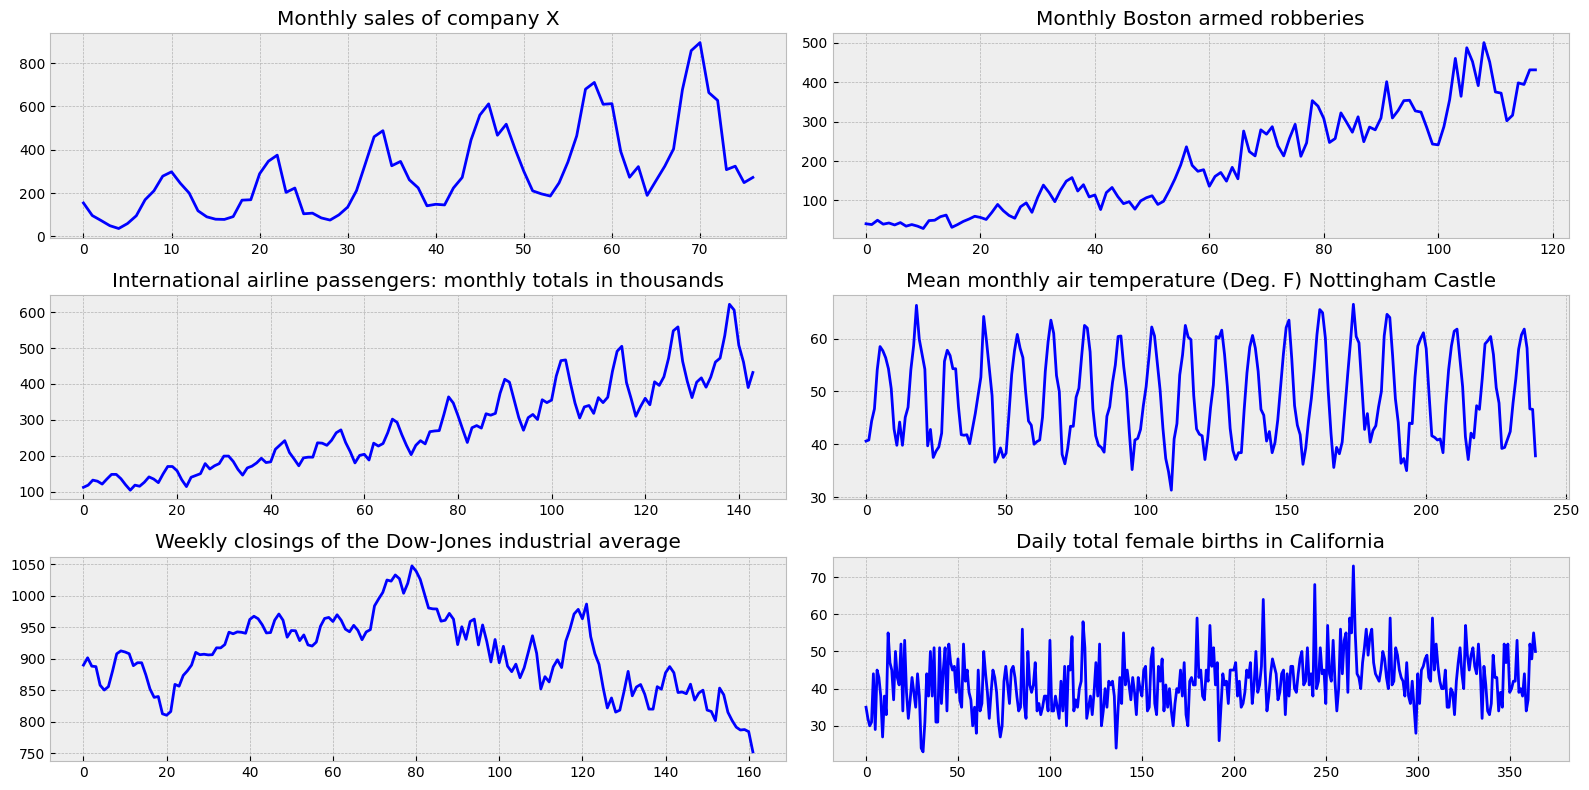

In [67]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Исходя из анализа графиков, только график №6 имеет стационарность, остальные не стационарные

Проверим на основе теста Дики - Фуллера данное предположение

In [68]:
def perform_adf_test(series_dict):
    results = {}
    
    for name, series in series_dict.items():
        adf_result = adfuller(series)
        results[name] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
            'Critical Values': adf_result[4],
            'Stationary': adf_result[1] < 0.05  # Если p-value < 0.05, ряд стационарен
        }
    
    return results

In [69]:
adf_results = perform_adf_test(all_series)

In [70]:
# Вывод результатов
for series_name, result in adf_results.items():
    print(f"Results for {series_name}:")
    print(f"  ADF Statistic: {result['ADF Statistic']}")
    print(f"  p-value: {result['p-value']}")
    print(f"  Critical Values: {result['Critical Values']}")
    print(f"  Stationary: {'Yes' if result['Stationary'] else 'No'}")
    print()

Results for Monthly sales of company X:
  ADF Statistic: 0.6547150829524443
  p-value: 0.9888894205170052
  Critical Values: {'1%': np.float64(-3.53692771987915), '5%': np.float64(-2.907887369384766), '10%': np.float64(-2.591493291015625)}
  Stationary: No

Results for Monthly Boston armed robberies:
  ADF Statistic: 1.0011021402457787
  p-value: 0.994277563805723
  Critical Values: {'1%': np.float64(-3.4936021509366793), '5%': np.float64(-2.8892174239808703), '10%': np.float64(-2.58153320754717)}
  Stationary: No

Results for International airline passengers: monthly totals in thousands:
  ADF Statistic: 0.8153688792060482
  p-value: 0.991880243437641
  Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}
  Stationary: No

Results for Mean monthly air temperature (Deg. F) Nottingham Castle:
  ADF Statistic: -3.2554924030863353
  p-value: 0.016989030222608687
  Critical Values: {'1%': np.float64(-3.459752

In [78]:
all_series_new = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
}

In [77]:
def make_stationary(series_dict):
    stationary_series = {}
    
    for name, series in series_dict.items():
        # Применяем первую разность для достижения стационарности
        diff_series = series.diff().dropna()
        
        # Сохраняем стационарный ряд в словаре
        stationary_series[name] = diff_series
    
    return stationary_series

In [76]:
# выполняем процедуру для стационарности рядов
stationary_series = make_stationary(all_series_new)